<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [248]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

In [249]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [250]:
# A:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [251]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [252]:
np.isnan(y).sum()

0

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [253]:
# A:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS']
X = X[features]
y = y

In [254]:
X.head()

,CRIM,ZN,INDUS,CHAS
0,0.00632,18.0,2.31,0.0
1,0.02731,0.0,7.07,0.0
2,0.02729,0.0,7.07,0.0
3,0.03237,0.0,2.18,0.0
4,0.06905,0.0,2.18,0.0


In [255]:
# Doing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(253, 4) (253, 4) (253,) (253,)


In [256]:
# Standardising X_train and X_test data
sc = StandardScaler()
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.fit_transform(X_test)

In [257]:
print(X_train_standard.shape, X_test_standard.shape)

(253, 4) (253, 4)


In [258]:
print(lr.score(X_train_standard, y_train))
print(lr.score(X_test_standard, y_test))

0.32709716447415316
0.3274169729774058


### Linear Regression

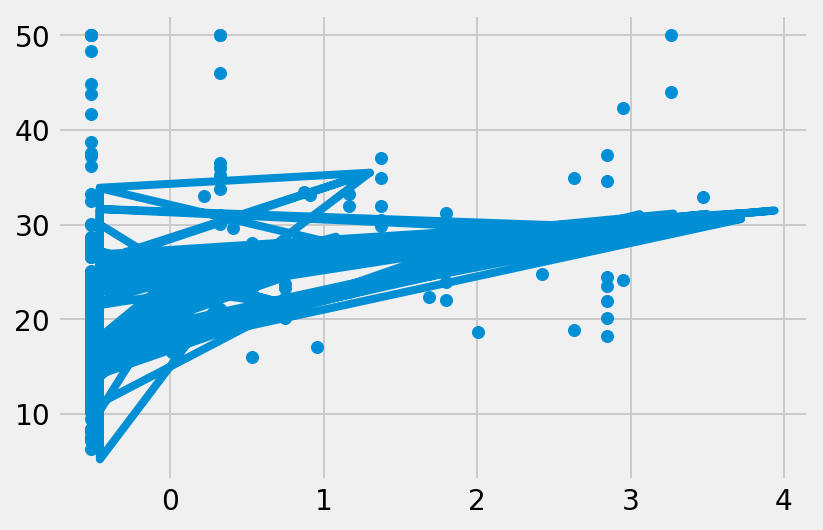

In [259]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_standard, y_train)
y_pred = lr.predict(X_test_standard)
plt.scatter(X_train_standard[:,1], y_train)
plt.plot(X_test_standard[:,1], y_pred);

In [260]:
#Calculating MSE for Y predictions
metrics.mean_squared_error(y_test, y_pred)

55.635862435406786

In [261]:
#Calculating RMSE for Y predictions
metrics.mean_squared_error(y_test, y_pred) ** 0.5

7.458945128864187

In [262]:
#Calculating MAE for Y predictions
metrics.mean_absolute_error(y_test, y_pred)

5.319497727498493

In [263]:
#Calculating R2 for Y predictions
metrics.r2_score(y_test, y_pred)

0.3142403419690163

### Ridge Regression

In [264]:
r_alphas = np.logspace(0,5,100)
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)
ridge_model = ridge_cv.fit(X_train_standard, y_train)
y_pred = ridge_model.predict(X_test_standard)

In [265]:
#Calculating MSE for Y predictions
metrics.mean_squared_error(y_test, y_pred)

55.253678893474614

In [266]:
#Calculating RMSE for Y predictions
metrics.mean_squared_error(y_test, y_pred) ** 0.5

7.433281838695114

In [267]:
#Calculating MAE for Y predictions
metrics.mean_absolute_error(y_test, y_pred)

5.2679027015919555

In [268]:
#Calculating R2 for Y predictions
metrics.r2_score(y_test, y_pred)

0.3189510814731401

### LASSO Regression

In [269]:
l_alphas = np.logspace(-3,0,100)
lasso_cv = LassoCV(alphas = l_alphas, cv=5, max_iter=50000)
lasso_model = lasso_cv.fit(X_train_standard, y_train)
y_pred = lasso_model.predict(X_test_standard)

In [270]:
#Calculating MSE for Y predictions
metrics.mean_squared_error(y_test, y_pred)

55.96024399658477

In [271]:
#Calculating RMSE for Y predictions
metrics.mean_squared_error(y_test, y_pred) ** 0.5

7.4806579922213245

In [272]:
#Calculating MAE for Y predictions
metrics.mean_absolute_error(y_test, y_pred)

5.341847164268727

In [273]:
#Calculating R2 for Y predictions
metrics.r2_score(y_test, y_pred)

0.310242061386537

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

### 70-30

In [274]:
# Doing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(354, 4) (152, 4) (354,) (152,)


In [275]:
# Standardising X_train and X_test data
sc = StandardScaler()
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.fit_transform(X_test)

In [276]:
print(X_train_standard.shape, X_test_standard.shape)

(354, 4) (152, 4)


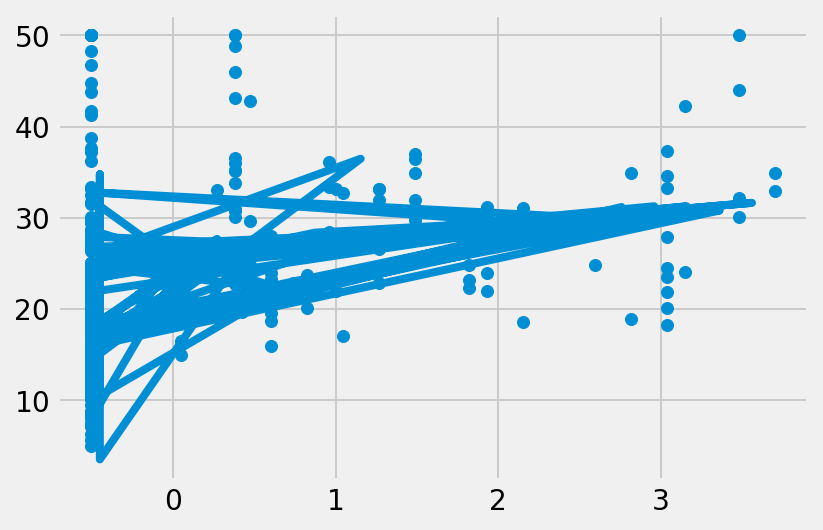

In [277]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_standard, y_train)
y_pred = lr.predict(X_test_standard)
plt.scatter(X_train_standard[:,1], y_train)
plt.plot(X_test_standard[:,1], y_pred);

In [278]:
#Calculating MSE for Y predictions
metrics.mean_squared_error(y_test, y_pred)

53.81253251994634

In [279]:
#Calculating RMSE for Y predictions
metrics.mean_squared_error(y_test, y_pred) ** 0.5

7.335702592113883

In [280]:
#Calculating MAE for Y predictions
metrics.mean_absolute_error(y_test, y_pred)

5.438306679709046

In [281]:
#Calculating R2 for Y predictions
metrics.r2_score(y_test, y_pred)

0.2778110732101645

In [282]:
print(lr.score(X_train_standard, y_train))
print(lr.score(X_test_standard, y_test))

0.3265224381093873
0.2778110732101645


### 90-10

In [283]:
# Doing a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 4) (51, 4) (455,) (51,)


In [284]:
# Standardising X_train and X_test data
sc = StandardScaler()
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.fit_transform(X_test)

In [285]:
print(X_train_standard.shape, X_test_standard.shape)

(455, 4) (51, 4)


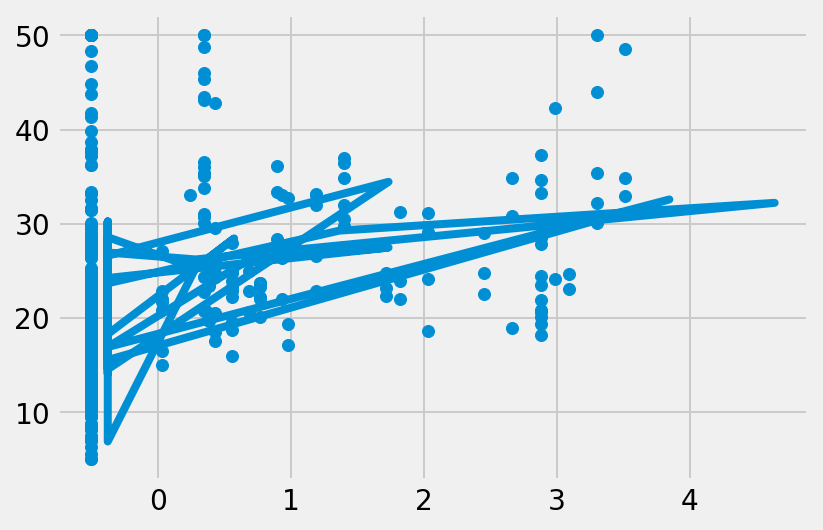

In [286]:
# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train_standard, y_train)
y_pred = lr.predict(X_test_standard)
plt.scatter(X_train_standard[:,1], y_train)
plt.plot(X_test_standard[:,1], y_pred);

In [287]:
#Calculating MSE for Y predictions
metrics.mean_squared_error(y_test, y_pred)

35.66952368080993

In [288]:
#Calculating RMSE for Y predictions
metrics.mean_squared_error(y_test, y_pred) ** 0.5

5.972396812068831

In [289]:
#Calculating MAE for Y predictions
metrics.mean_absolute_error(y_test, y_pred)

4.378077784645338

In [290]:
#Calculating R2 for Y predictions
metrics.r2_score(y_test, y_pred)

0.42868630300750765

In [291]:
print(lr.score(X_train_standard, y_train))
print(lr.score(X_test_standard, y_test))

0.3181862324987499
0.42868630300750765


### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [292]:
# 5 fold cross-validation on Linear Regression
cross_val_score(lr, X_train_standard, y_train, cv=5).mean()

0.3021724593029682

In [293]:
# 10 fold cross-validation on Linear Regression
cross_val_score(lr, X_train_standard, y_train, cv=10).mean()

0.2903480285934156

In [294]:
# 5 fold cross-validation on LASSO Regression
cross_val_score(lasso_model, X_train_standard, y_train, cv=5).mean()

0.30217100603086555

In [295]:
# 5 fold cross-validation on RIDGE Regression
cross_val_score(ridge_model, X_train_standard, y_train, cv=5).mean()

0.30296651219842297

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [296]:
# A:

### 5.1) Explain what could be wrong with this approach.

In [297]:
# A:

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [298]:
import patsy

# A: